# With Little Power Comes Great Responsibility

The definition of statistical power of a hypthesis test:
> the probability that, given a real effect, an experiment will reject the null hypothesis

or 

> the probability that a statistical test will successfully detect a true effect.

or in math

$
\begin{align}
A &= \text{test shows significance} \\
B &= \text{there is a true effect} \\
P(A|B) &= \text{statistical power}
\end{align}
$

## lingo

effect sizes = difference between the novel model and the best-performing baseline
underpowered = power less than 80%

## 1. Introduction

> If it is the case that typical experiments in NLP are underpowered, not only would we expect **many meaningful improve- ments to go undetected**, we would also expect **many apparently significant differences to be exaggerated** (Gelman and Carlin, 2014).

- Power depends on multiple factors, including the statistical test used, the significance threshold, true effect size, variance, and sample size.
- Power should be computed prior to testing as it determines the minimum requirements for the test.
- Larger effects and those with less variance are easier to detect, and require fewer samples for equivalent power.
- With underpowered experiments...
  - true effects go undetected; when significant effects are found, they are likely to be noisier and have lower positive predictive value
  - experiments are more likely to exaggerate or reverse the true effect - Type-M (magnitude) and Type-S (sign) errors
- Among human evaluations, we find most experimental designs involve too few items and/or raters to detect small effects
- We find that some widely used benchmark datasets, including MRPC and SST-2, are now too small to be able to properly measure future progress against top performing models


## 2. Power Analysis for NLP
- Because most NLP tasks do not take the form of standard experiments in other sciences (Kraemer and Blasey, 2015; Westfall et al., 2014), it is non- trivial to run power analyses for many tasks of interest.
- We present here a generalizable, simulation-based approach to power analysis, along with three sam- ple applications, which can be extended as neces- sary.
- [...] In the case of NLP, this means that one recruits enough subjects, collects enough ratings, or uses a large enough test set.

The general prodecure is as follows:
1. begin with the end in mind.
2. If one plans to test for a difference between models, one needs to choose the statistical test that will be used. That test will determine the level of detail required in the generative process for simulating data.
3. 

## 3 Comparing Models on Accuracy

- An important but rarely asked question is, can these benchmarks sup- port the kinds of comparisons we want to make?
- Many emphasize the need for proper significance testing to avoid spurious findings
- **BUT** If an experiment’s test set is small, the minimum detectable effect (MDE) size may be large: only large improvements will yield sufficiently powered comparisons (i.e., $\ge$ 80% power).
- If an experiment is badly underpowered, it cannot provide useful evidence that one model achieves slightly better performance than another for the underlying data distribution.


### 3.2 Estimating parameters

Three aproaches are suggested:
1. Using the validation + test set
2. Regress parameters
3. Default routine

### 4. Machine Translation

In [322]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [237]:
from scipy import stats

In [459]:
def compute_power(n, effect, iterations=5_000, delta=.05):
    pvalues = []
    for _ in range(iterations):
        x = np.random.binomial(1, p=.5, size=n)
        y = np.random.binomial(1, p=.5+effect, size=n)
        if np.array_equal(x, y):  # these are discarded and throw a warning
            continue
        pvalues.append(wilcoxon(x, y).pvalue <= delta)
    
    return np.mean(pvalues)

def plot_power(xs, powers, effect):
    plt.plot(xs, powers)
    #plt.title("$e*$ = %.1f" % effect)
    plt.xlabel("n")
    plt.ylabel("power")
    plt.hlines(0.8, 25, 150, linestyles="dotted")

compute_power(50, 0.1)

0.1792

In [457]:
import warnings
warnings.filterwarnings('ignore') 

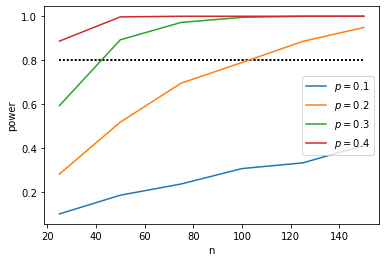

In [460]:
effects = [.1, .2, .3, .4]
for effect in effects:
    xs = []
    powers = []
    for n in range(25, 151, 25):
        # print(n)
        power = compute_power(n, effect, iterations=1_000)
        powers.append(power)
        xs.append(n)
    plot_power(xs, powers, effect)
plt.legend(["$p = %.1f$" % tmp for tmp in effects])